In [1]:
import pandas as pd
import numpy as np

In [32]:
# Step 1: Load the data
#Load the training data and Labels
train_data = pd.read_csv('p1_train.csv',header=None)

#Load the test data and Labels
test_data = pd.read_csv('p1_test.csv',header=None)

In [33]:
train_data.shape

(10000, 3)

In [31]:
train_data.head()

,0,1,2
0,-7.262173,9.572604,5.358725
1,3.462140,10.684524,-13.275822
2,-12.996801,-3.446163,31.815190
3,7.083537,-14.074146,1.995030
4,-15.216890,-18.630651,48.812452


### Cleaning Dataset

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [36]:
# By using describe function checking for min, max, percentaile and outliers
train_data.describe()

,0,1,2
count,10000.000000,10000.000000,10000.000000
mean,-0.111211,0.099982,3.101570
std,11.550481,11.478836,25.851530
min,-19.996699,-19.998481,-59.284604
25%,-10.243879,-9.766645,-16.589593
50%,-0.054870,0.222515,3.057164
75%,9.759060,10.003534,22.960145
max,19.997594,19.990429,65.001858


In [38]:
#checking for null values
train_data.isnull().sum()
# both columns null count is 0 so no null values in dataset

0    0
1    0
2    0
dtype: int64

In [39]:
#ckecking for duplicate
train_data.duplicated().sum()

# count is zero so no duplicate

0

In [40]:
#checking for datatype in right format or not
train_data.dtypes

#datatype also in the right format and and also a strctured data.

0    float64
1    float64
2    float64
dtype: object

In [42]:
# Step 3: Preprocessing
X_train = train_data.iloc[:, :-1]  # Features
y_train = train_data.iloc[:, -1]   # Target variable
X_test = test_data.iloc[:, :-1]    # Features
y_test = test_data.iloc[:, -1]     # Target variable

In [43]:
X_train

,0,1
0,-7.262173,9.572604
1,3.462140,10.684524
2,-12.996801,-3.446163
3,7.083537,-14.074146
4,-15.216890,-18.630651
...,...,...
9995,16.981033,-7.377274
9996,0.258434,-19.488764
9997,17.588664,11.326009
9998,0.531756,-15.189405


In [44]:
y_train

0        5.358725
1      -13.275822
2       31.815190
3        1.995030
4       48.812452
          ...    
9995   -21.776089
9996    22.098571
9997   -47.812604
9998    20.791085
9999   -20.735447
Name: 2, Length: 10000, dtype: float64

In [46]:
#finding outlier for each column
#0 column
iqr=X_train[0].quantile(0.75)-X_train[0].quantile(0.25)
upper_threshold=X_train[0].quantile(0.75)+(1.5*iqr)
lower_threshold=X_train[0].quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold
     

(39.76346871038202, -40.24828803242754)

In [47]:
#finding outlier for each column
#Average_income column
iqr=X_train[1].quantile(0.75)-X_train[1].quantile(0.25)
upper_threshold=X_train[1].quantile(0.75)+(1.5*iqr)
lower_threshold=X_train[1].quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold

(39.65880177495164, -39.42191252816714)

In [49]:
X_train.shape

(10000, 2)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train) # developing model on training data not on the original training data

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [52]:
# Step 6: Reporting Results
print("Mean Squared Error (MSE) on test split:", mse)
print("Mean Absolute Error (MAE) on test split:", mae)

Mean Squared Error (MSE) on test split: 5.046436003951251
Mean Absolute Error (MAE) on test split: 1.7990800530982611


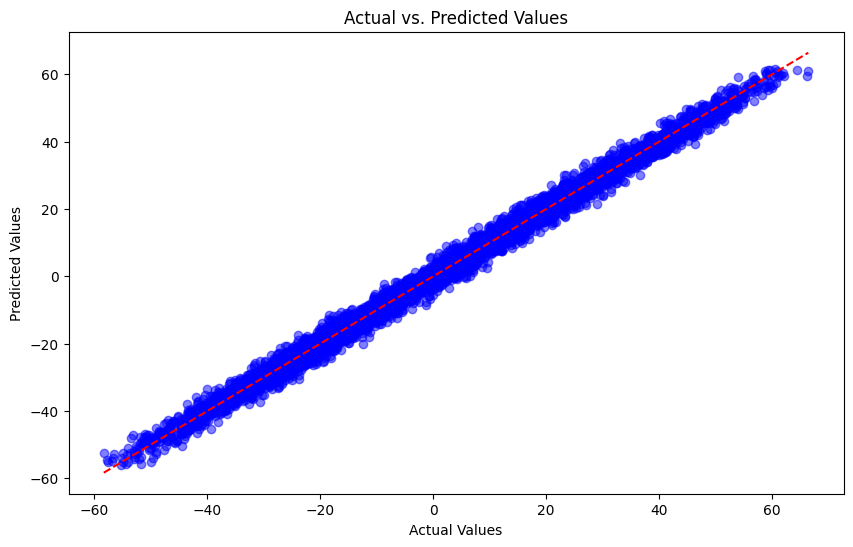

In [55]:

import matplotlib.pyplot as plt # Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Plotting the diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()